In [ ]:
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [76]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

masterdata_csv = pd.read_csv('data.csv')
masterdata_csv.replace(r'   ', np.NaN)

masterdata_csv = masterdata_csv.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(masterdata_csv)

masterdata_csv.to_csv("data1.csv")


      Hour  Immobilized_bus  Broken_Truck Vehicle_excess Accident_victim  \
0    07:00                0             0              T               0   
1    07:30                0             0              F               0   
2    08:00                0             0              F               0   
3    08:30                0             0              F               0   
4    09:00                0             0              F               0   
5    09:30                0             0              F               0   
6    10:00                0             0              F               0   
7    10:30                0             0              F               0   
8    11:00                0             0              F               0   
9    11:30                0             0              F               0   
10   12:00                0             0              F               0   
11   12:30                0          1000              F               0   
12   13:00  

In [77]:
df = masterdata_csv
df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent'],
      dtype='object')

In [78]:
print(df['Hour'].unique())
print(df['Immobilized_bus'].unique())
print(df['Broken_Truck'].unique())
print(df['Vehicle_excess'].unique())
print(df['Accident_victim'].unique())
print(df['Running_over'].unique())
print(df['Fire_vehicles'].unique())
print(df['Occurrence_involving_freight'].unique())
print(df['Incident_involving_dangerous_freight'].unique())
print(df['Lack_of_electricity'].unique())
print(df['Fire'].unique())
print(df['Point_of_flooding'].unique())
print(df['Manifestations'].unique())
print(df['Defect_in_the_network_of_trolleybuses'].unique())
print(df['Tree_on_the_road'].unique())
print(df['Semaphore_off'].unique())
print(df['Intermittent_Semaphore'].unique())
print(df['Slowness_in_traffic_percent'].unique())


['07:00' '07:30' '08:00' '08:30' '09:00' '09:30' '10:00' '10:30' '11:00'
 '11:30' '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30'
 '16:00' '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
[0 2 1 4]
[   0 1000    2    1    5    4    3]
[' T' ' F' ' f']
['0' '1' '2' '3' nan]
['0' ' NO' '1' '2' '-1']
[' NO' '0' ' YES']
[0 1]
['0' '1' nan]
[0 1 2 4 3]
[0 1]
[   0 2000    1    3    7]
[ 0  1 -1]
['0' '1' '3' '2' '-8' nan]
[0 1]
['0' '1' '2' '4' nan]
[0 1]
[ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  8.5  7.8  8.4  9.3 11.  12.1 13.1 13.7 15.3 16.8 15.6
  3.4  3.8  5.9  7.   6.2  6.5  6.8 10.1 12.2 13.9 15.  17.1 19.6 20.2
 22.6 23.4 19.3  4.   5.   5.7  5.6 10.8 12.5 10.5 18.3 19.9 21.5 22.1
  5.5  9.  12.3 11.9  9.7  8.9 11.3 13.  14.6 17.4 17.8 18.1 17.7]


In [79]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,07:00,0,0,T,0,0,NO,0,0,0,0,0,0,0,0,0,0,4.1
1,07:30,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,6.6
2,08:00,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,8.7
3,08:30,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,9.2
4,09:00,0,0,F,0,0,NO,0,0,0,0,0,0,0,0,0,0,11.1


In [125]:
traffic_df = pd.DataFrame()

traffic_df['Hour'] = df['Hour']
traffic_df['Immobilized_bus'] = df['Immobilized_bus']
traffic_df['Broken_Truck'] = df['Broken_Truck']
traffic_df['Vehicle_excess'] = df['Vehicle_excess']
traffic_df['Accident_victim'] = df['Accident_victim']
traffic_df['Running_over'] = df['Running_over']
traffic_df['Fire_vehicles'] = df['Fire_vehicles']
traffic_df['Occurrence_involving_freight'] = df['Occurrence_involving_freight']
traffic_df['Incident_involving_dangerous_freight'] = df['Incident_involving_dangerous_freight']
traffic_df['Lack_of_electricity'] = df['Lack_of_electricity']
traffic_df['Fire'] = df['Fire']
traffic_df['Point_of_flooding'] = df['Point_of_flooding']
traffic_df['Manifestations'] = df['Manifestations']
traffic_df['Defect_in_the_network_of_trolleybuses'] = df['Defect_in_the_network_of_trolleybuses']
traffic_df['Tree_on_the_road'] = df['Tree_on_the_road']
traffic_df['Semaphore_off'] = df['Semaphore_off']
traffic_df['Intermittent_Semaphore'] = df['Intermittent_Semaphore']
traffic_df['Slowness_in_traffic_percent'] = df['Slowness_in_traffic_percent']

In [126]:
traffic_df.dtypes


Hour                                      object
Immobilized_bus                            int64
Broken_Truck                               int64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight               int64
Incident_involving_dangerous_freight     float64
Lack_of_electricity                        int64
Fire                                       int64
Point_of_flooding                          int64
Manifestations                             int64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                           int64
Semaphore_off                             object
Intermittent_Semaphore                     int64
Slowness_in_traffic_percent              float64
dtype: object

In [127]:
traffic_df['Vehicle_excess'] = traffic_df['Vehicle_excess'].astype(str)

traffic_df['Accident_victim']= traffic_df['Accident_victim'].astype(str).astype(float)
traffic_df['Running_over']= traffic_df['Running_over'].astype(str)
traffic_df['Fire_vehicles']= traffic_df['Fire_vehicles'].astype(str)

traffic_df['Incident_involving_dangerous_freight'] = traffic_df['Incident_involving_dangerous_freight'].astype(str).astype(float)

traffic_df['Defect_in_the_network_of_trolleybuses'] = traffic_df['Defect_in_the_network_of_trolleybuses'].astype(str).astype(float)

traffic_df['Semaphore_off'] = traffic_df['Semaphore_off'].astype(str).astype(float)




In [128]:
traffic_df.dtypes

Hour                                      object
Immobilized_bus                            int64
Broken_Truck                               int64
Vehicle_excess                            object
Accident_victim                          float64
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight               int64
Incident_involving_dangerous_freight     float64
Lack_of_electricity                        int64
Fire                                       int64
Point_of_flooding                          int64
Manifestations                             int64
Defect_in_the_network_of_trolleybuses    float64
Tree_on_the_road                           int64
Semaphore_off                            float64
Intermittent_Semaphore                     int64
Slowness_in_traffic_percent              float64
dtype: object

In [135]:
mean = traffic_df['Accident_victim'].mean()
print(mean)

0.4492753623188406


In [136]:
traffic_df['Accident_victim'].fillna(mean)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
135    0.000000
136    2.000000
137    2.000000
138    0.449275
139    0.000000
Name: Accident_victim, Length: 140, dtype: float64

In [141]:
Accident_victim = {'YES': 1.0,'NO': 0.0}
traffic_df.Accident_victim = [Accident_victim[item] for item in traffic_df.Accident_victim]

KeyError: 0.0

(138,)

In [52]:
X = df.iloc[:,0:17]
y = df.iloc[:,-1]

corrmat = df.corr()

top_corr_features = corrmat.index


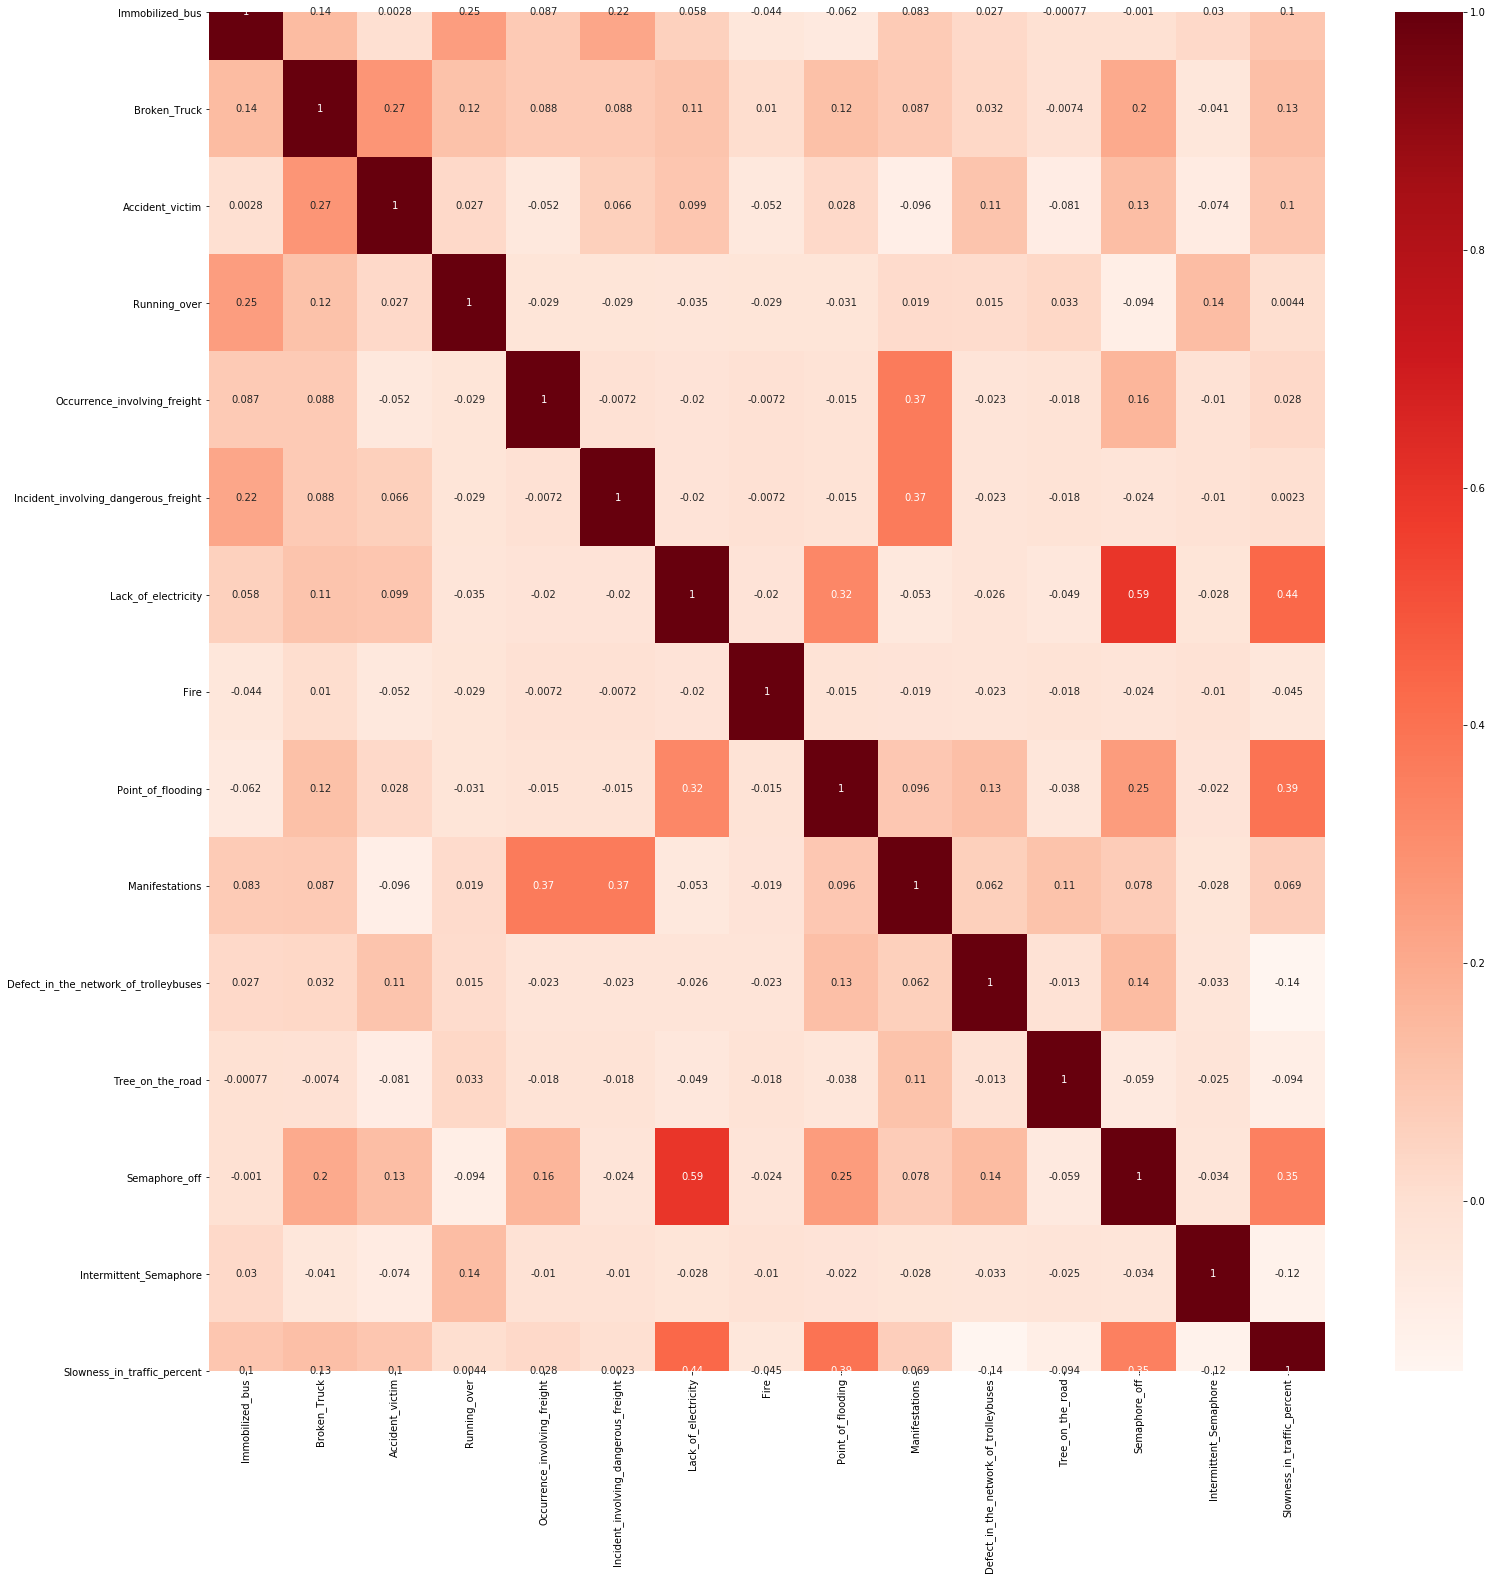

In [49]:
plt.figure(figsize=(25,25))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [1]:
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)